Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/BigData/weatherAUS.csv"

Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from tempfile import template
import numpy as np
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read CSV File

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,12/6/2008,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,12/7/2008,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,12/8/2008,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,12/9/2008,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,12/10/2008,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


Read Info and Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


Text(0.5, 1.0, 'Type of data ')

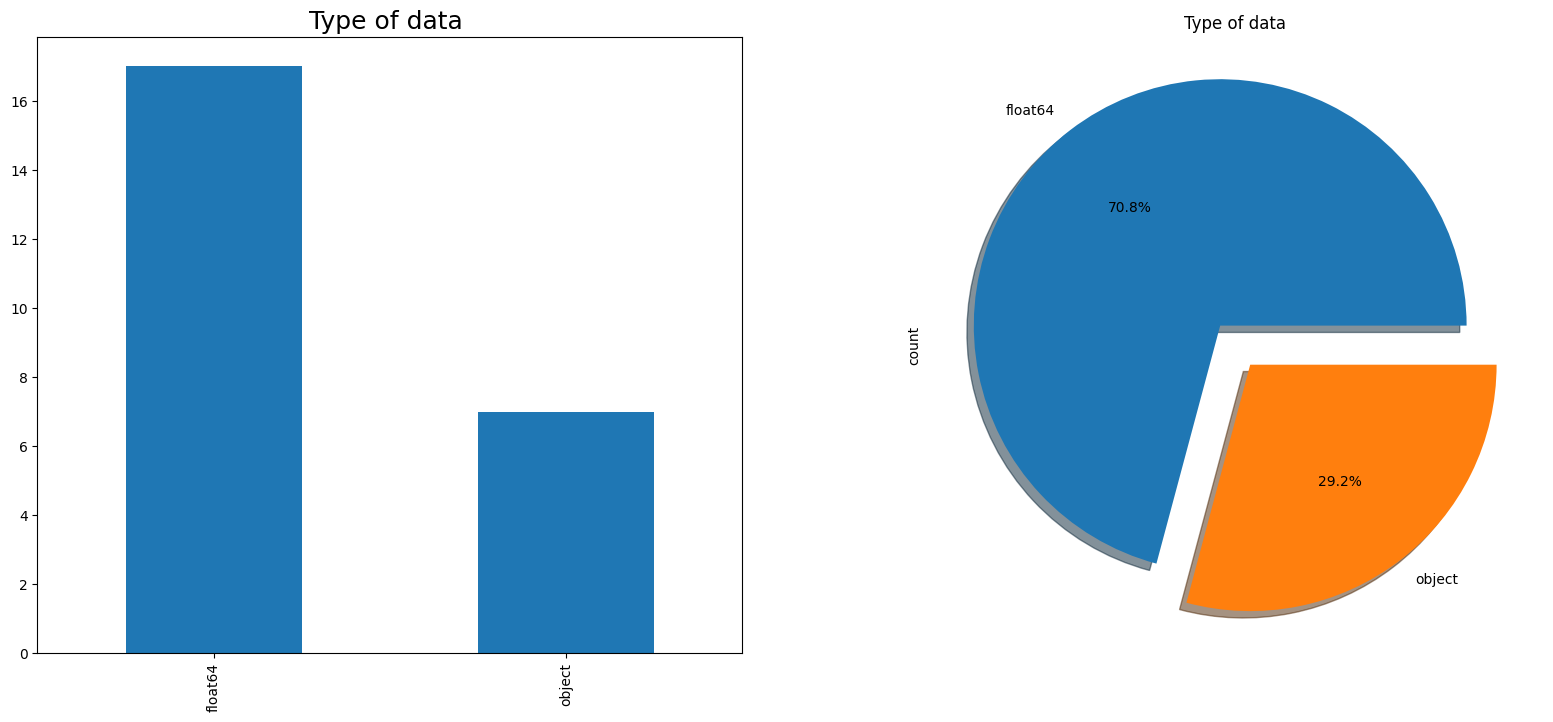

In [ ]:
# Check the Type of our data

fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

df.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("Type of data ", fontsize=18)

df.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('Type of data');
axarr[0].set_title("Type of data ", fontsize=18)

Check for NaN values

In [ ]:
df.isnull().values.any()

True

In [ ]:
nan_rows = df.isnull().sum()
print(nan_rows)

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


# **Data Preprocessing**

Rain Today / Rain Tomorrow

In [ ]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [ ]:
df['RainToday'].value_counts()

RainToday
0.0    109332
1.0     31455
Name: count, dtype: int64

In [ ]:
df['RainTomorrow'].value_counts()

RainTomorrow
0    110316
1     31877
Name: count, dtype: int64

In [ ]:
print(type(df['RainTomorrow'].value_counts()))

<class 'pandas.core.series.Series'>


<ipython-input-15-75648d15cfb5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='RainToday', data = df, palette = "Set2")


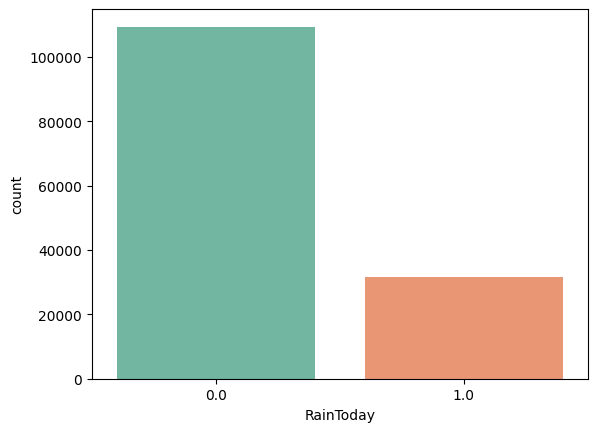

In [ ]:
# count plot on RainToday
sns.countplot(x ='RainToday', data = df, palette = "Set2")

# Show the plot
plt.show()

<ipython-input-16-f4e26686a1d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='RainTomorrow', data = df, palette = "Set1")


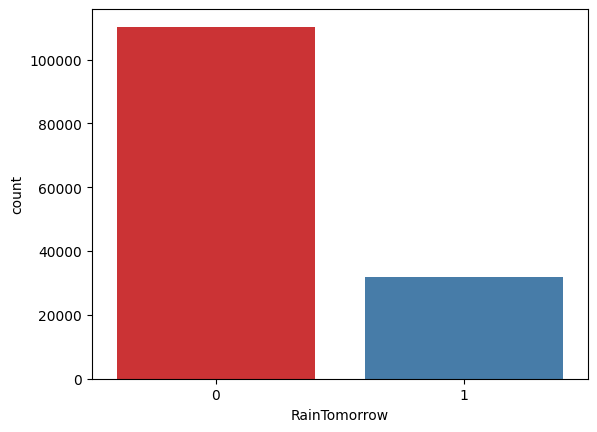

In [ ]:
# count plot on RainTomorrow
sns.countplot(x ='RainTomorrow', data = df, palette = "Set1")

# Show the plot
plt.show()

Change Categorical into Numerical: LOCATION ONLY

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [ ]:
# Impute categorical var with Mode
df['Date'] = df['Date'].fillna(df['Date'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [ ]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,890,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,989,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,1088,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,1115,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,1124,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0
5,1133,2,14.6,29.7,0.2,NaN,NaN,14,56.0,13,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0.0,0.0,0
6,1142,2,14.3,25.0,0.0,NaN,NaN,13,50.0,12,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0.0,0.0,0
7,1151,2,7.7,26.7,0.0,NaN,NaN,13,35.0,10,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0.0,0.0,0
8,1160,2,9.7,31.9,0.0,NaN,NaN,6,80.0,9,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0.0,1.4,1
9,899,2,13.1,30.1,1.4,NaN,NaN,13,28.0,8,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1.0,0.0,0


<ipython-input-21-1f60ae4d1178>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=df, palette="Set1")


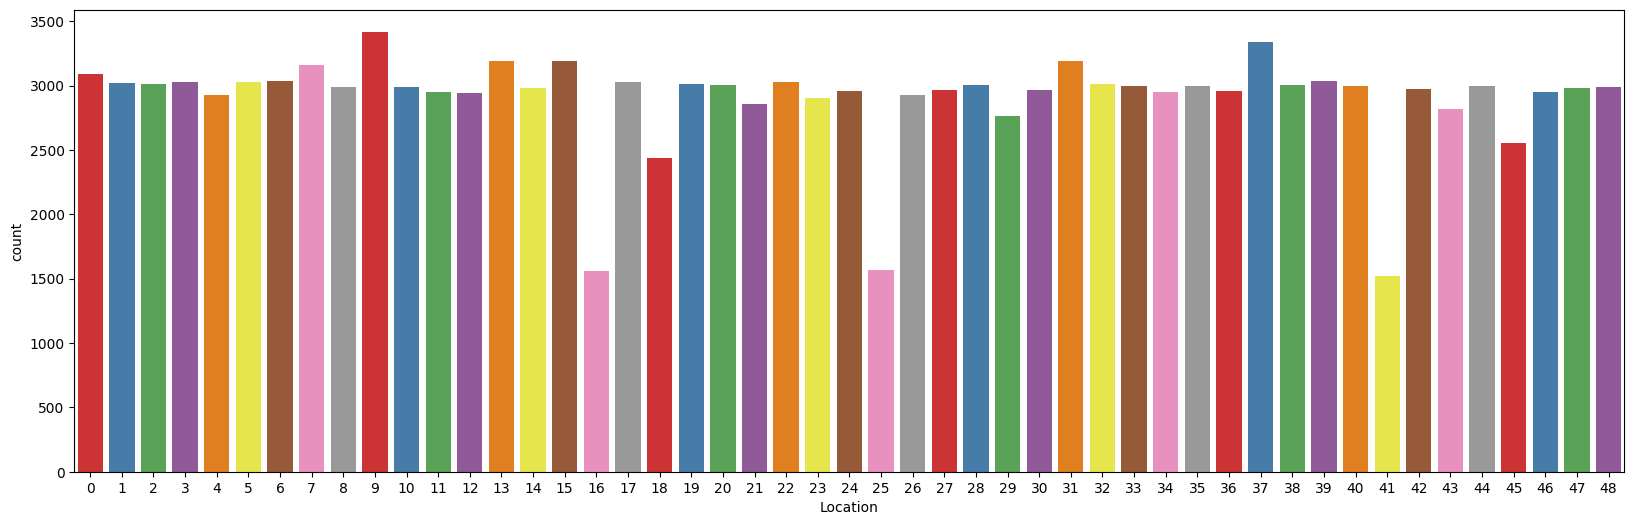

In [ ]:
# Check how many classes in Location

# Set the size of the figure
plt.figure(figsize=(20, 6))

# count plot on single categorical variable
sns.countplot(x='Location', data=df, palette="Set1")

# Add space between plots
plt.subplots_adjust(hspace=20)

# Show the plot
plt.show()

# 49 classes in Location_numerical

<ipython-input-22-4cb91dd4058a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WindGustDir', data=df, palette="Set1")


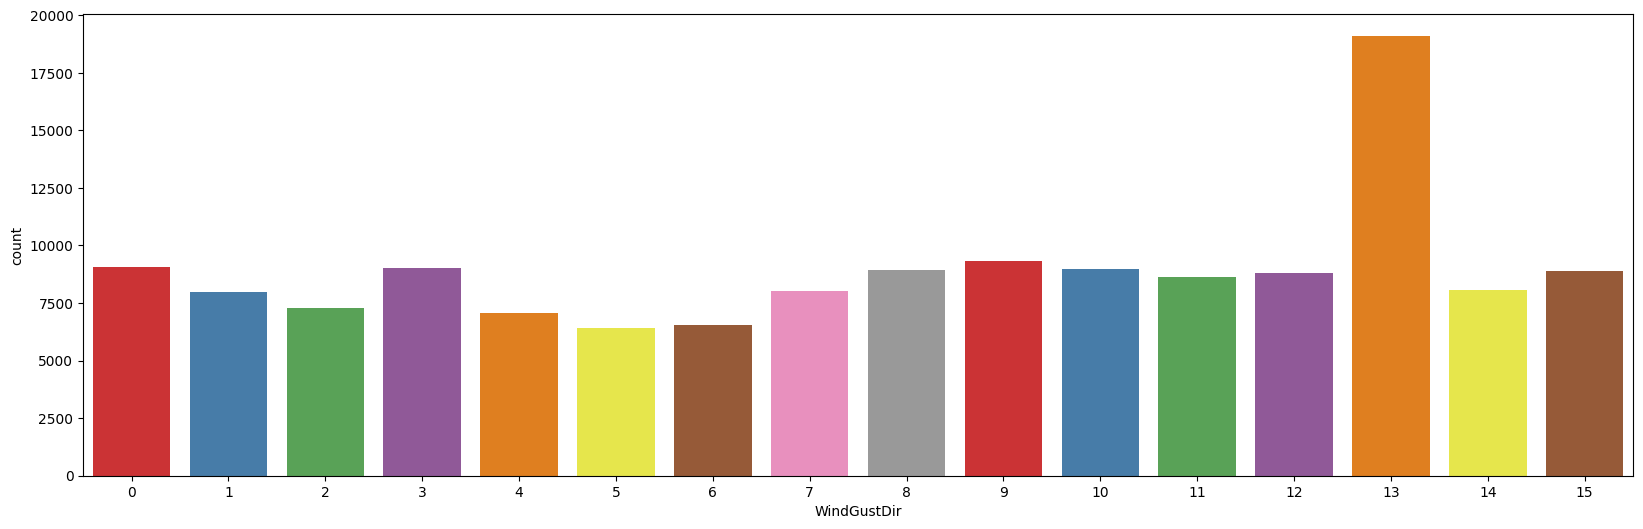

In [ ]:
# Check how many classes in Location

# Set the size of the figure
plt.figure(figsize=(20, 6))

# count plot on single categorical variable
sns.countplot(x='WindGustDir', data=df, palette="Set1")

# Add space between plots
plt.subplots_adjust(hspace=20)

# Show the plot
plt.show()


# **Fill each NaN column with the appropriate value**


Check that there arent any more Object types

In [ ]:
nan_rows = df.isnull().sum()
print(nan_rows)

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  int64  
 1   Location       142193 non-null  int64  
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    142193 non-null  int64  
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     142193 non-null  int64  
 10  WindDir3pm     142193 non-null  int64  
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Fill the REST of the numerical NaN values

In [ ]:
# Calculate the median of the MinTemp column
median_mintemp = df['MinTemp'].median()

# Replace NaN values in the MinTemp column with the median
df['MinTemp'].fillna(median_mintemp, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
median_maxtemp = df['MaxTemp'].median()

# Replace NaN values in the MinTemp column with the median
df['MaxTemp'].fillna(median_maxtemp, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
median_rainfal = df['Rainfall'].median()

# Replace NaN values in the MinTemp column with the median
df['Rainfall'].fillna(median_rainfal, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
mean_evap = df['Evaporation'].mean()

# Replace NaN values in the MinTemp column with the median
df['Evaporation'].fillna(mean_evap, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
mean_sunshine = df['Sunshine'].mean()

# Replace NaN values in the MinTemp column with the median
df['Sunshine'].fillna(mean_sunshine, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
mean_windgustsp = df['WindGustSpeed'].mean()

# Replace NaN values in the MinTemp column with the median
df['WindGustSpeed'].fillna(mean_windgustsp, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
mean_windspeed9 = df['WindSpeed9am'].mean()

# Replace NaN values in the MinTemp column with the median
df['WindSpeed9am'].fillna(mean_windspeed9, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
mean_windspeed3 = df['WindSpeed3pm'].mean()

# Replace NaN values in the MinTemp column with the median
df['WindSpeed3pm'].fillna(mean_windspeed3, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
mean_hum9 = df['Humidity9am'].mean()

# Replace NaN values in the MinTemp column with the median
df['Humidity9am'].fillna(mean_hum9, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
mean_hum3 = df['Humidity3pm'].mean()

# Replace NaN values in the MinTemp column with the median
df['Humidity3pm'].fillna(mean_hum3, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
median_press9 = df['Pressure9am'].median()

# Replace NaN values in the MinTemp column with the median
df['Pressure9am'].fillna(median_press9, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
median_press3 = df['Pressure3pm'].median()

# Replace NaN values in the MinTemp column with the median
df['Pressure3pm'].fillna(median_press3, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
median_cloud9 = df['Cloud9am'].median()

# Replace NaN values in the MinTemp column with the median
df['Cloud9am'].fillna(median_cloud9, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
median_cloud3 = df['Cloud3pm'].median()

# Replace NaN values in the MinTemp column with the median
df['Cloud3pm'].fillna(median_cloud3, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
mean_temp9 = df['Temp9am'].mean()

# Replace NaN values in the MinTemp column with the median
df['Temp9am'].fillna(mean_temp9, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
mean_temp3 = df['Temp3pm'].mean()

# Replace NaN values in the MinTemp column with the median
df['Temp3pm'].fillna(mean_temp3, inplace=True)

In [ ]:
# Calculate the median of the MinTemp column
median_raintoday = df['RainToday'].median()

# Replace NaN values in the MinTemp column with the median
df['RainToday'].fillna(median_raintoday, inplace=True)

In [ ]:
nan_rows = df.isnull().sum()
print(nan_rows)

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


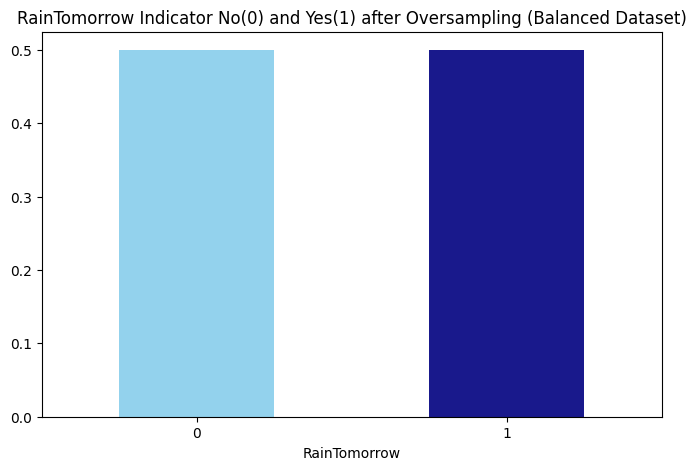

In [ ]:
# Due to imbalancing, we will balance the data for efficiency
#-Darweesh This might have altered the nan values since balancing involves duplicating the rows with yes to match with no so any NAN value involved would be duplicated in the process###

##will further experiment this theory###

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]

# Check if the 'yes' DataFrame is empty before resampling
if len(yes) > 0:
    yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
else:
    print("The 'yes' DataFrame is empty. Oversampling cannot be performed.")

# Combine the oversampled 'yes' data with the 'no' data
oversampled = pd.concat([no, yes_oversampled])

# Update the 'MiceImputed' DataFrame
df = oversampled

# Plot the bar chart
fig = plt.figure(figsize=(8, 5))
df.RainTomorrow.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

<Axes: >

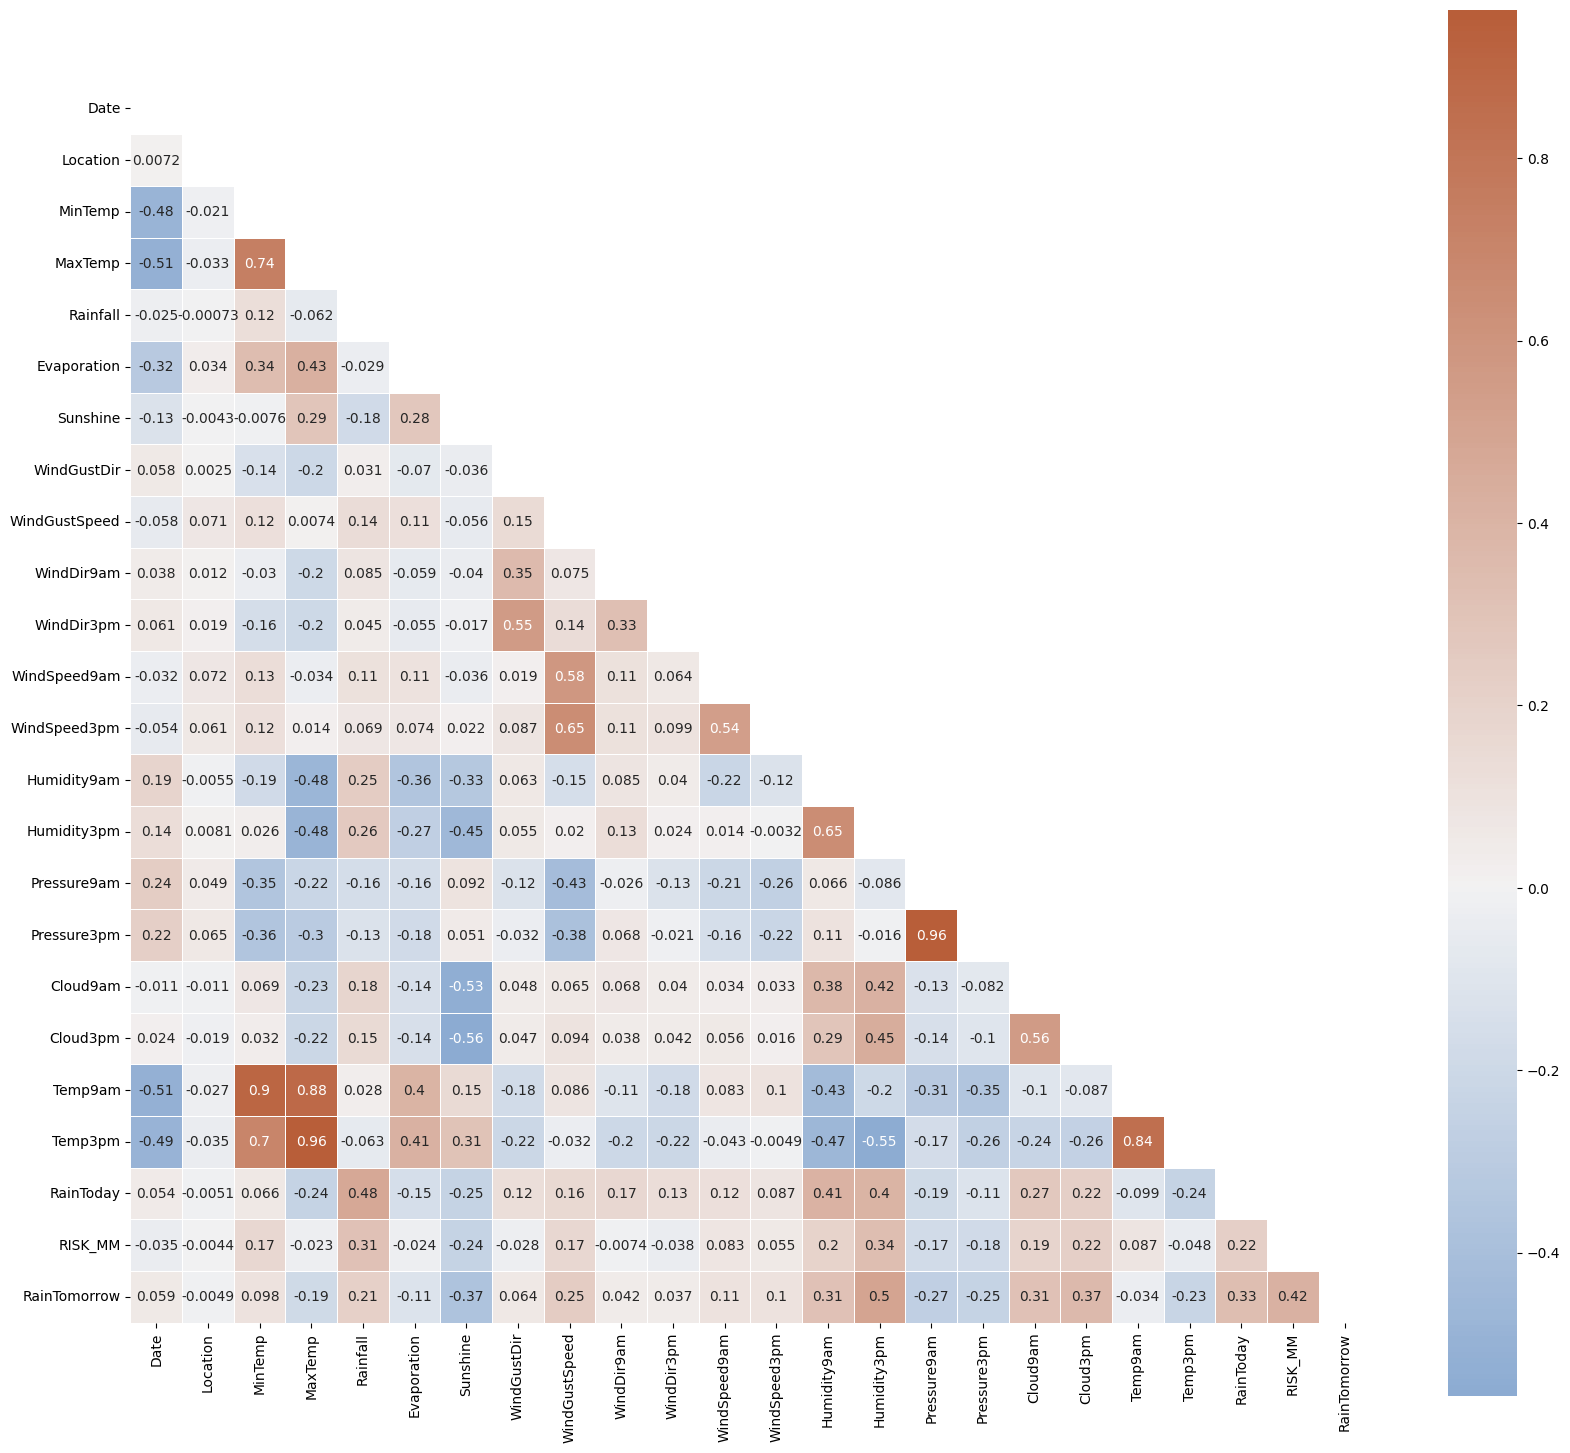

In [ ]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

The following feature pairs have a strong correlation with each other:

 * MaxTemp and MinTemp
* Pressure9h and pressure3h
* Temp9am and Temp3pm
* Evaporation and MaxTemp
* MaxTemp and Temp3pm But in no case is the correlation value equal to a perfect “1”. We are therefore not removing any functionality

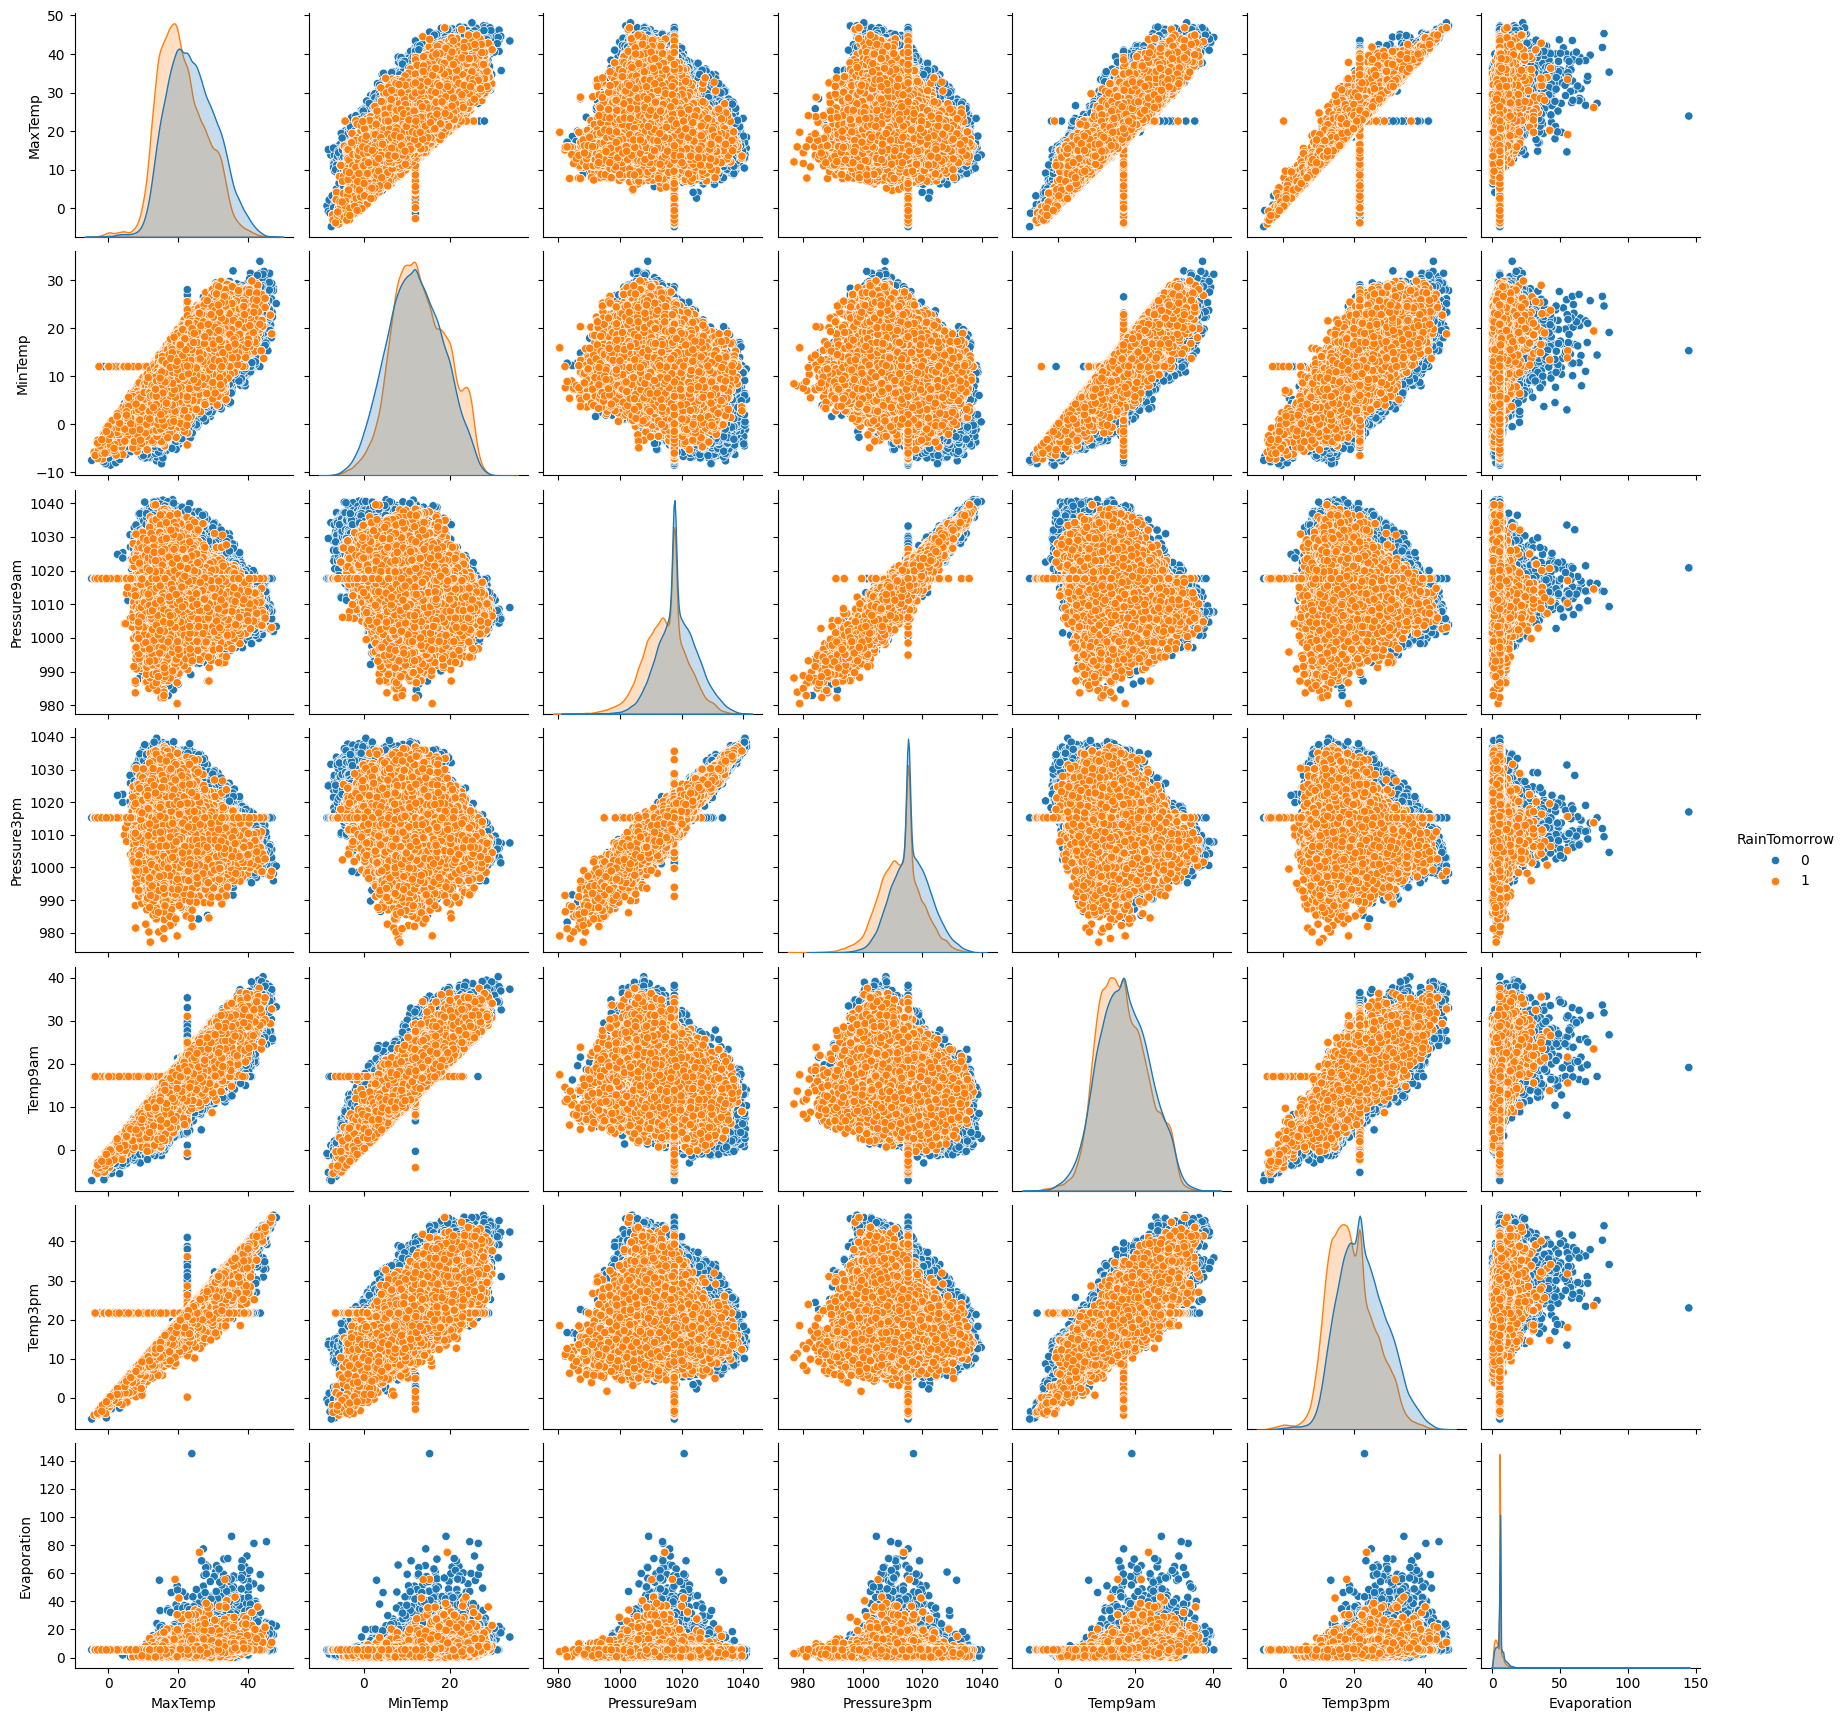

In [ ]:
sns.pairplot( data=df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

Feature Extraction Train Test Validate

In [ ]:
# Standardizing data
df1 = df.copy()
from sklearn import preprocessing
# scales the data from range 0-1
r_scaler = preprocessing.MinMaxScaler()
# Computes the minimum and maximum values for each feature in df1. These values will be used to scale the data
r_scaler.fit(df1)
# scales the data then returns it into a dataframe
modified_data = pd.DataFrame(r_scaler.transform(df1), index=df1.index, columns=df1.columns)

In [ ]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
# seprate features from target
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
# Chi-Square test is used to evaluate the independence between categorical variables.
#In feature selection, it helps identify features that have the strongest relationship with the target variable.
# k= 10 is forthe fetures that we have
selector = SelectKBest(chi2, k=10)
#chi2 is applied to each function to evaluate independance
selector.fit(X, y)
# choose the new features
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = df1.drop('RainTomorrow', axis=1)
y = df1['RainTomorrow']
# use random forest, 100 decision trees, used as best estimator, selectmodel selects features based on the importance weights assigned by the random forest.
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
# returns a boolean array that indicates which features are selected based on the feature importances learned by the model.
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
# relative importance of each feature in predicting the target variable
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Humidity3pm', 'RISK_MM']
[0.00273032 0.00175662 0.00347778 0.00389542 0.02832688 0.00143519
 0.02365719 0.00160207 0.01186484 0.00162595 0.00187491 0.00145064
 0.00215512 0.01592276 0.05856411 0.00983869 0.01057134 0.00762446
 0.01420223 0.00266547 0.00579572 0.01226607 0.77669623]


In [ ]:
features = df1[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                       'RainToday']]
target = df1['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
# normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report, confusion_matrix

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0
    print("Accuracy = {}".format(accuracy))
    # true positive against false positive
    print("ROC Area under Curve = {}".format(roc_auc))
    # performance of a classification model by considering the agreement between predicted and actual classifications,
    #while accounting for the possibility of the agreement occurring by chance.
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_curve(fper, tper)

    plot_confusion_matrix_custom(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

    return model, accuracy, roc_auc, coh_kap, time_taken

def plot_roc_curve(fper, tper):
    plt.figure(figsize=(8, 6))
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def plot_confusion_matrix_custom(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true'):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)  # Assuming binary classification
    plt.xticks(tick_marks, ['0', '1'])
    plt.yticks(tick_marks, ['0', '1'])

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


Accuracy = 0.7790891620435839
ROC Area under Curve = 0.7791334917742581
Cohen's Kappa = 0.5582155196543419
Time taken = 3.8299002647399902
              precision    recall  f1-score   support

           0    0.76965   0.79481   0.78203     27501
           1    0.78911   0.76346   0.77607     27657

    accuracy                        0.77909     55158
   macro avg    0.77938   0.77913   0.77905     55158
weighted avg    0.77941   0.77909   0.77904     55158



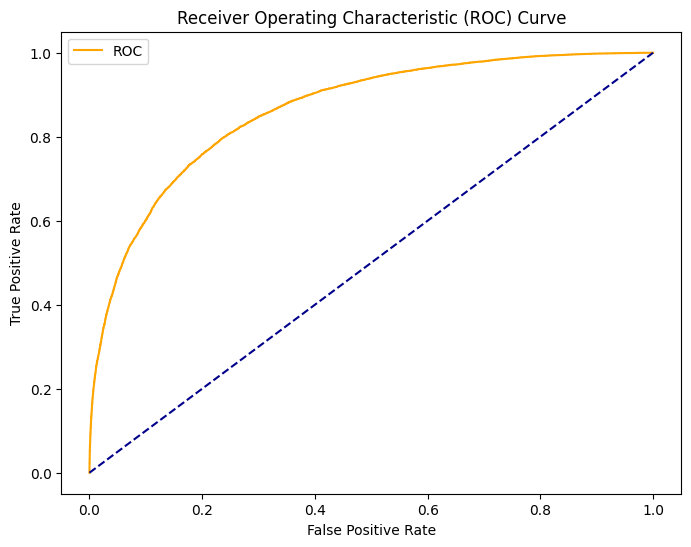

Normalized confusion matrix


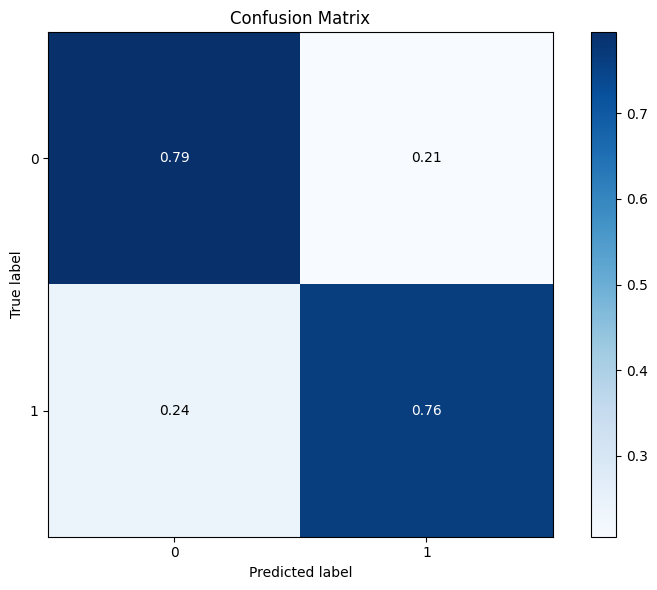

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8308132999746184
ROC Area under Curve = 0.830766208783525
Cohen's Kappa = 0.6615929372663666
Time taken = 1.4324185848236084
              precision    recall  f1-score   support

           0    0.84141   0.81412   0.82754     27501
           1    0.82094   0.84742   0.83397     27657

    accuracy                        0.83081     55158
   macro avg    0.83117   0.83077   0.83075     55158
weighted avg    0.83114   0.83081   0.83076     55158



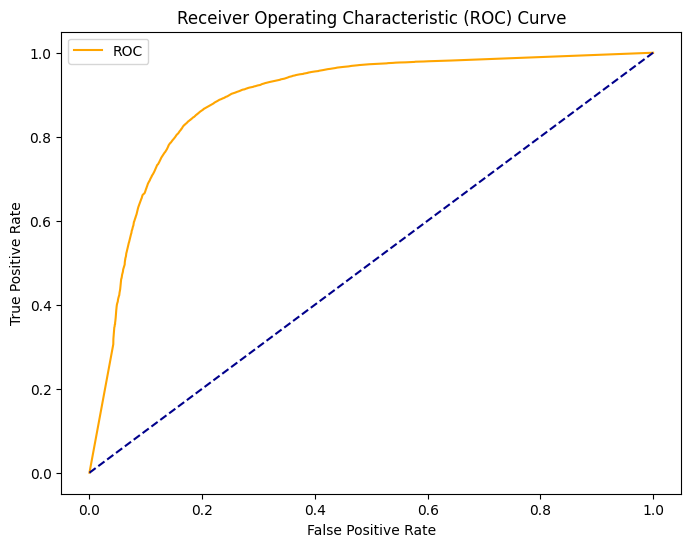

Normalized confusion matrix


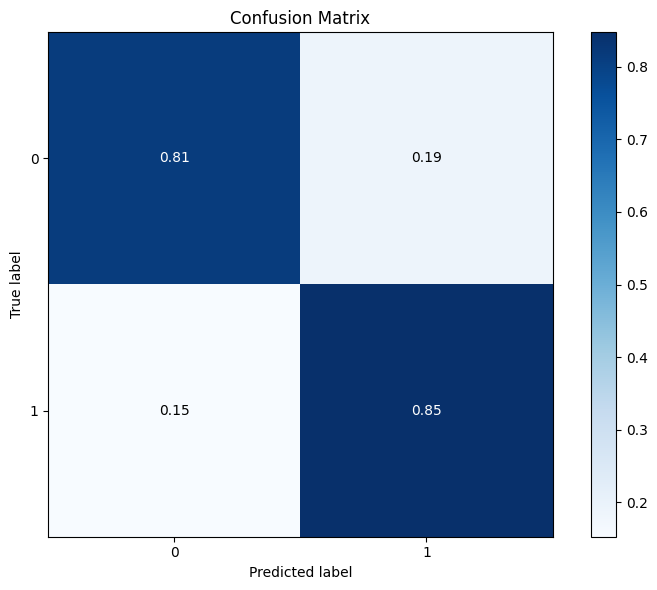

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8880670075057109
ROC Area under Curve = 0.8880111446725922
Cohen's Kappa = 0.7761076107061997
Time taken = 41.57757306098938
              precision    recall  f1-score   support

           0    0.90348   0.86826   0.88552     27501
           1    0.87389   0.90776   0.89050     27657

    accuracy                        0.88807     55158
   macro avg    0.88868   0.88801   0.88801     55158
weighted avg    0.88864   0.88807   0.88802     55158



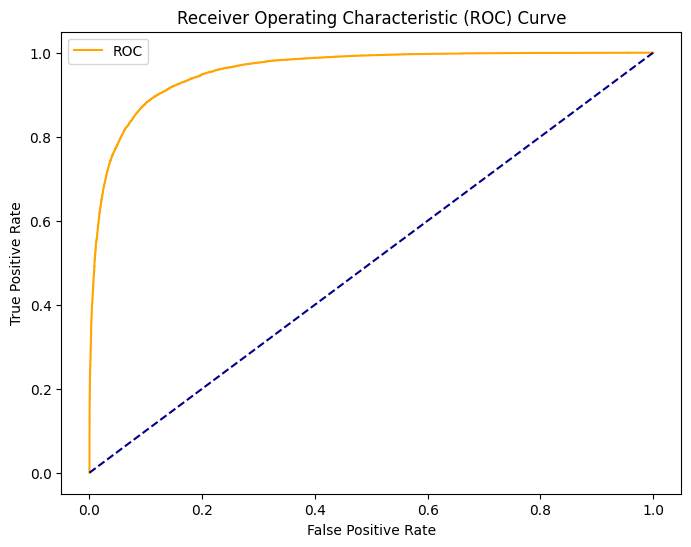

Normalized confusion matrix


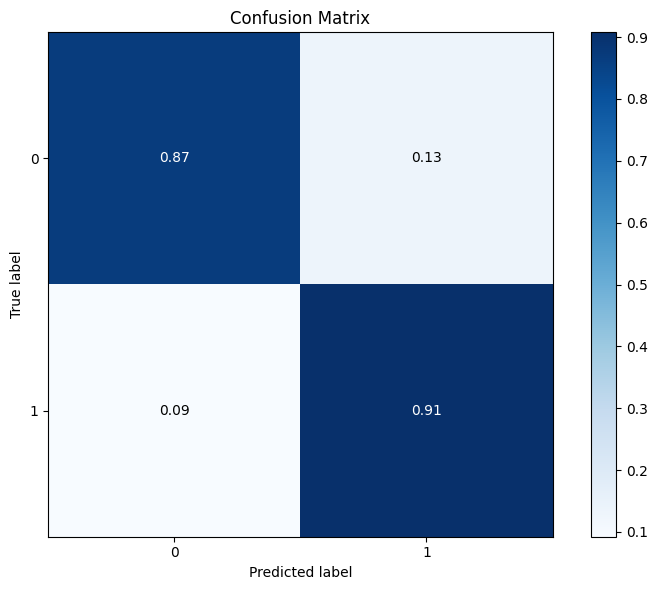

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.9287138765002357
ROC Area under Curve = 0.9286642867750998
Cohen's Kappa = 0.8574126334402237
Time taken = 34.27062129974365
              precision    recall  f1-score   support

           0    0.94394   0.91113   0.92725     27501
           1    0.91458   0.94620   0.93012     27657

    accuracy                        0.92871     55158
   macro avg    0.92926   0.92866   0.92868     55158
weighted avg    0.92922   0.92871   0.92869     55158



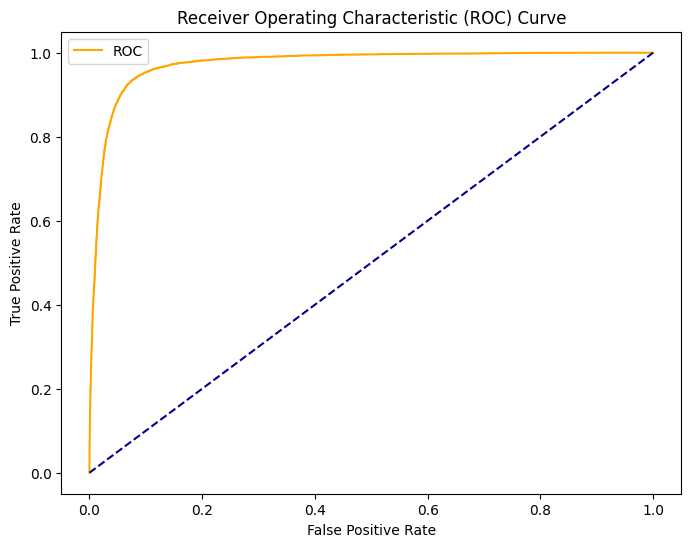

Normalized confusion matrix


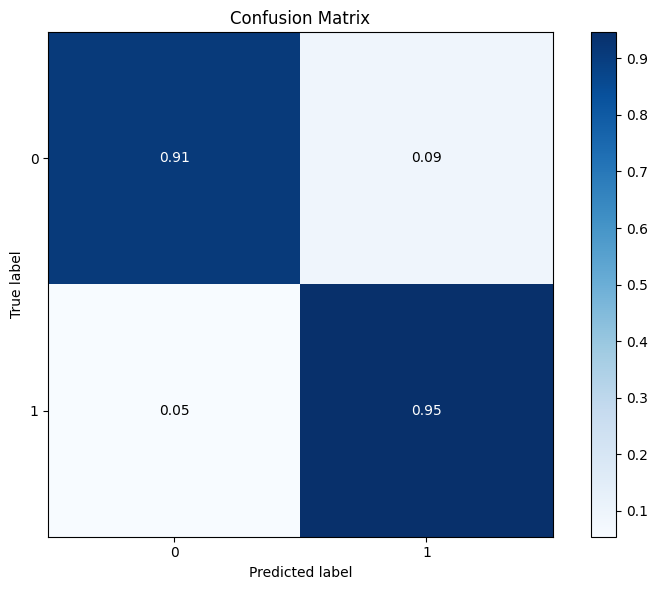

In [ ]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

<ipython-input-56-6e3b71b7d9f4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')


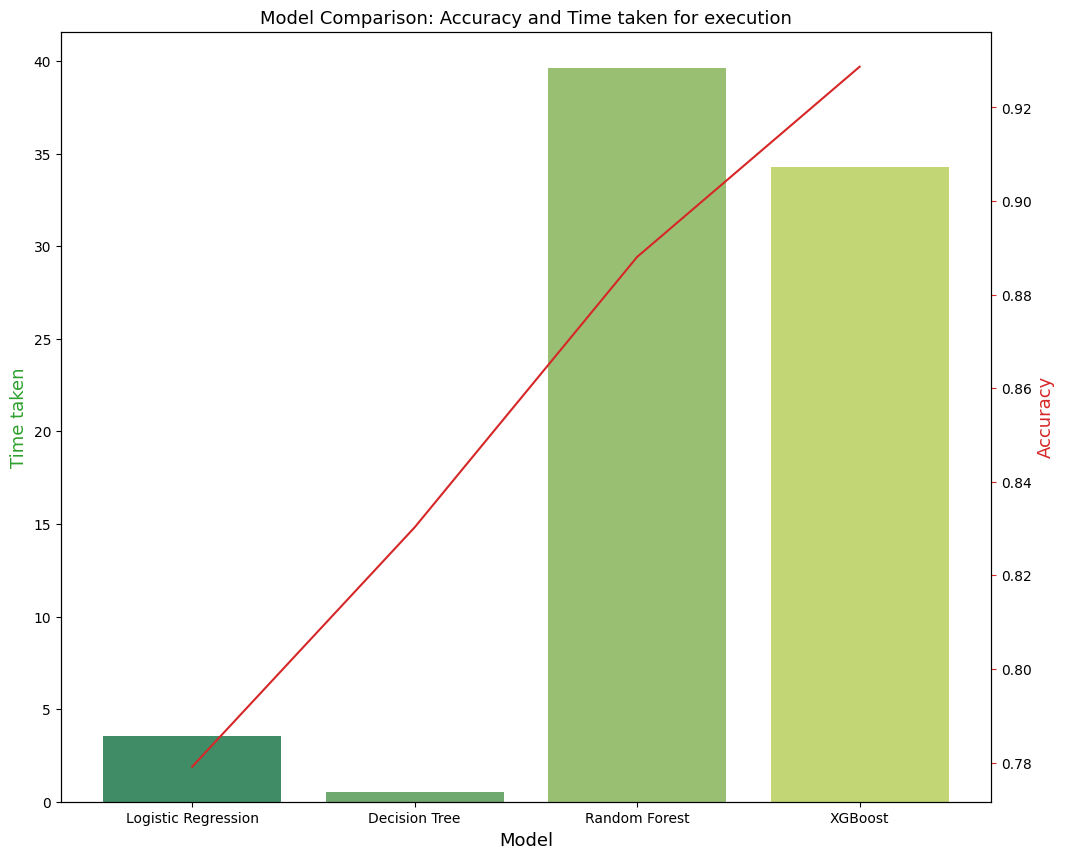

In [ ]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf , roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_rf, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)